In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("../data/features/train_features.csv")
wide_df = pd.read_csv("../data/features/train_wide_features.csv")
df.shape, wide_df.shape

((2736, 197), (996, 317))

In [3]:
features = df.drop(["id", "sii"], axis=1).columns
wide_features = wide_df.drop(["id", "sii"], axis=1).columns
features, wide_features

(Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
        'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
        'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
        ...
        'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
        'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
        'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
       dtype='object', length=195),
 Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
        'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
        'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
        ...
        'stat_110', 'stat_111', 'stat_112', 'stat_113', 'stat_114', 'stat_115',
        'stat_116', 'stat_117', 'stat_118', 'stat_119'],
       dtype='object', length=315))

<Axes: xlabel='sii'>

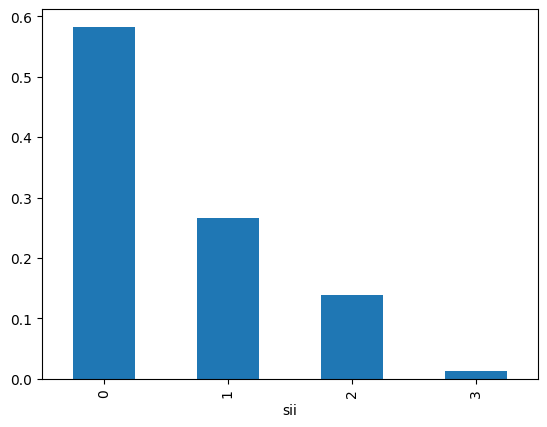

In [4]:
# target distribution
df["sii"].value_counts(normalize=True).plot(kind="bar")



<Axes: xlabel='sii'>

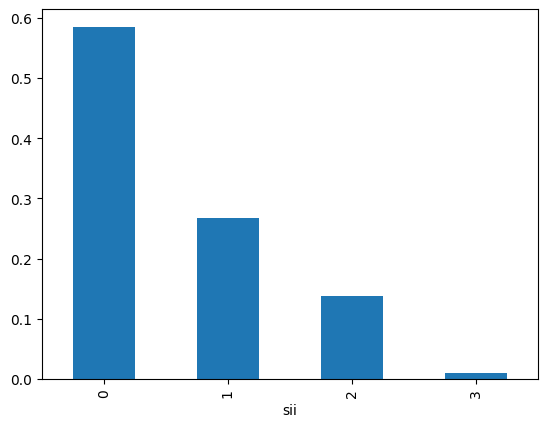

In [5]:
wide_df["sii"].value_counts(normalize=True).plot(kind="bar")

<Axes: >

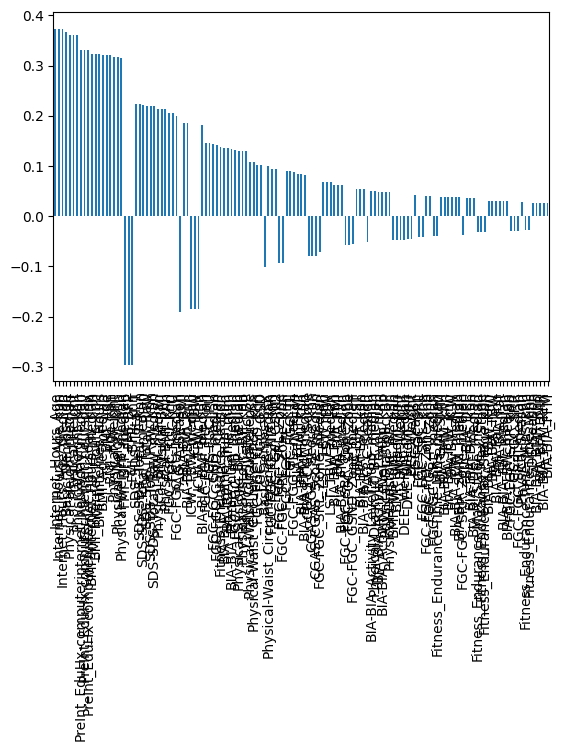

In [17]:
# plot correlation
corr = df.drop(["id"], axis=1).corr()
sii_corr = corr["sii"].sort_values(ascending=False, key=abs).head(int(len(features) * .7)).drop("sii")
sii_corr.plot(kind="bar")


<Axes: >

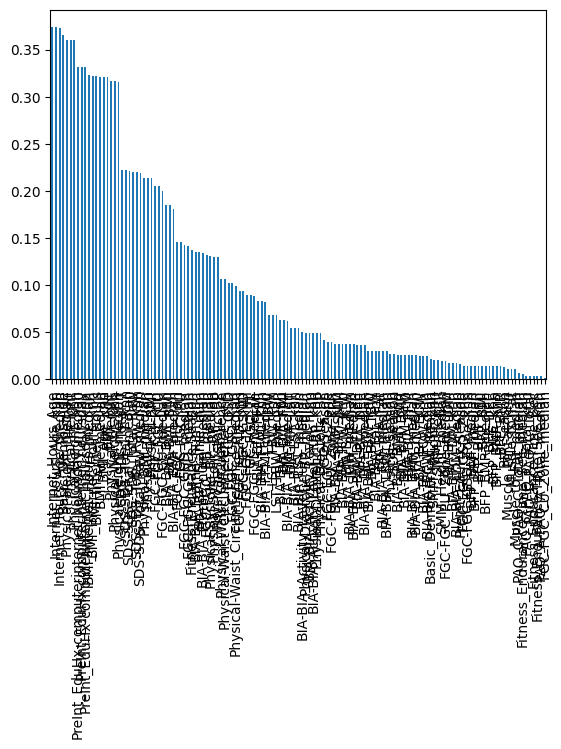

In [16]:
sii_corr.plot(kind="bar")

In [ ]:
# features.to_list(), wide_features.to_list()
def select_features(dframe, feature_list, threshold, labels):
    selected_features = []
    for feature in feature_list:
        if dframe[feature].corr(dframe["sii"]) > threshold:
            selected_features.append(feature)
    return selected_features

(['Basic_Demos-Age',
  'Basic_Demos-Sex',
  'CGAS-CGAS_Score',
  'Physical-BMI',
  'Physical-Height',
  'Physical-Weight',
  'Physical-Waist_Circumference',
  'Physical-Diastolic_BP',
  'Physical-HeartRate',
  'Physical-Systolic_BP',
  'Fitness_Endurance-Max_Stage',
  'Fitness_Endurance-Time_Mins',
  'Fitness_Endurance-Time_Sec',
  'FGC-FGC_CU',
  'FGC-FGC_CU_Zone',
  'FGC-FGC_GSND',
  'FGC-FGC_GSND_Zone',
  'FGC-FGC_GSD',
  'FGC-FGC_GSD_Zone',
  'FGC-FGC_PU',
  'FGC-FGC_PU_Zone',
  'FGC-FGC_SRL',
  'FGC-FGC_SRL_Zone',
  'FGC-FGC_SRR',
  'FGC-FGC_SRR_Zone',
  'FGC-FGC_TL',
  'FGC-FGC_TL_Zone',
  'BIA-BIA_Activity_Level_num',
  'BIA-BIA_BMC',
  'BIA-BIA_BMI',
  'BIA-BIA_BMR',
  'BIA-BIA_DEE',
  'BIA-BIA_ECW',
  'BIA-BIA_FFM',
  'BIA-BIA_FFMI',
  'BIA-BIA_FMI',
  'BIA-BIA_Fat',
  'BIA-BIA_Frame_num',
  'BIA-BIA_ICW',
  'BIA-BIA_LDM',
  'BIA-BIA_LST',
  'BIA-BIA_SMM',
  'BIA-BIA_TBW',
  'PAQ_A-PAQ_A_Total',
  'PAQ_C-PAQ_C_Total',
  'SDS-SDS_Total_Raw',
  'SDS-SDS_Total_T',
  'PreInt_EduHx